---

**<font color="green">Комментарий наставника</font>**

Привет, Галина! Меня зовут Дарина и я заменяю Евгения пока он в отпуске. Спасибо тебе за работу! 

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий наставника». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от наставника

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от наставника


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

# Цель  
– выбрать гипотезы для тестирования с помощью фреймворков ICE и RICE;  
– проанализировать результаты А/В теста: сравнить выручки, конверсии и средние чеки в группах;  
– принять решение по остановке или продолжению теста.

# Часть 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.set_option('max_colwidth', 2000)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Задача 1.

In [4]:
hypothesis.columns = hypothesis.columns.str.strip().str.lower()
hypothesis['hypothesis_id'] = np.arange(len(hypothesis)) 

In [5]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).astype(int)
hypothesis

,hypothesis,reach,impact,confidence,efforts,hypothesis_id,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,5,1
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,6,8
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16


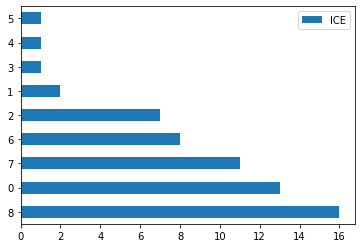

In [6]:
result_1 = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
result_1.plot(kind='barh')

In [7]:
print('Самые перспективные гипотезы по ICE:\n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[8],
                                       hyp=hypothesis['hypothesis'].iloc[8]),
      ' \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[0], hyp=hypothesis['hypothesis'].iloc[0]),
     ' \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[7], hyp=hypothesis['hypothesis'].iloc[7]))

Самые перспективные гипотезы по ICE:
8 – Запустить акцию, дающую скидку на товар в день рождения  
0 – Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
7 – Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


### Задача 2.

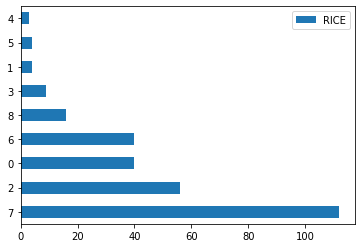

In [8]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])
                      / hypothesis['efforts']).astype(int)
result_2 = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
result_2.plot(kind='barh')
plt.show()

In [9]:
print('Самые перспективные гипотезы по RICE: \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[7],
                                       hyp=hypothesis['hypothesis'].iloc[7]),
      ' \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[2], hyp=hypothesis['hypothesis'].iloc[2]),
     ' \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[0], hyp=hypothesis['hypothesis'].iloc[0]),
     ' \n{number} – {hyp}'.format(number=hypothesis['hypothesis_id'].iloc[6], hyp=hypothesis['hypothesis'].iloc[6]))

Самые перспективные гипотезы по RICE: 
7 – Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
2 – Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
0 – Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
6 – Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


### Задача 3.

После добавления компонента Reach, который показывает, сколько пользователей затронут изменения, поменялась и приоритезация задач. Так, у гипотез под номерами 7 и 2 было очень высокое значение параметра Reach, и в совокупности с показателями других компонентов они оказались на первых позициях в рейтинге приоритетов, а гипотеза под номером 8, которая была на первом месте по расчётам фреймворка ICE, оказалась на последнем, так как охват пользователей этой гипотезы был оценён очень низко.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Правильный комментарий насчет того почему поменялись местами гипотезы. 
Графики -- очень круто) но можно было нарисовать их на одном -- так было бы нагляднее увидеть смену приоритетов)

</div>

---

# Часть 2

Сделаем предобратку данных: проверим на пропуски, дубликаты и соответствующие типы. 

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [17]:
visitors.duplicated().sum()

0

In [18]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors = visitors.drop_duplicates()

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

С этим шагом все ок!

</div>

---

### Задача 1.

Чтобы отследить изменения результатов проведённого А/В-теста на каждый день тестирования, изучим графики накапливаемых данных. Метрики, которые мы будем сравнивать, это выручка, средний чек и конверсия.

Для начала соберём агрегированные кумулятивные по дням данные о заказах и посетителях магазина, затем объединим таблицы и посмотроим графики.

In [19]:
dates_groups = orders[['date', 'group']]
dates_groups.head()

,date,group
0,2019-08-15,B
1,2019-08-15,B
2,2019-08-15,A
3,2019-08-15,B
4,2019-08-15,B


In [20]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated.sample(5)

,date,group,transaction_id,visitor_id,revenue
154,2019-08-01,A,24,20,148579
336,2019-08-25,B,507,466,4901584
360,2019-08-06,B,129,123,824337
200,2019-08-23,A,426,385,2874367
346,2019-08-03,A,68,62,354874


In [21]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated.sample(5)

,date,group,visitors
1048,2019-08-11,B,6998
1078,2019-08-12,B,7541
760,2019-08-09,B,5908
1044,2019-08-11,A,6980
297,2019-08-25,A,14943


In [22]:
cummulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,A,24,20,148579,719
2,2019-08-01,A,24,20,148579,719
3,2019-08-01,A,24,20,148579,719
4,2019-08-01,A,24,20,148579,719


In [23]:
cummulative_revenue_A = cummulative_data[cummulative_data['group']=='A'][['date','revenue', 'orders']]
cummulative_revenue_B = cummulative_data[cummulative_data['group']=='B'][['date','revenue', 'orders']]

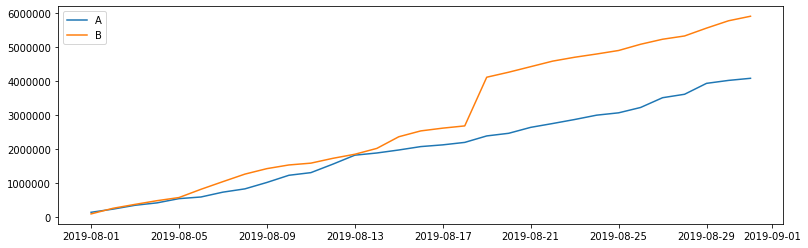

In [24]:
plt.figure(figsize=(13,4))
plt.plot(cummulative_revenue_A['date'], cummulative_revenue_A['revenue'], label='A')
plt.plot(cummulative_revenue_B['date'], cummulative_revenue_B['revenue'], label='B')
plt.legend()
plt.show()

Группа А стабильно хуже по кумулятивным показателям, чем группа В. Примерно в середине теста выручка в группах оказалась в одной точке, но через несколько дней в группе В она резко увеличилась, возможно, из-за большого числа заказов или из-за чрезмерно дорогих заказов, в то время как накапливаемая выручка в группе А увеличивалась на протяжении теста равномерно, без всплесков.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Верные предположения по поводу всплеска.
</div>

---

### Задача 2.

Построим графики кумулятивного среднего чека в группах.

In [25]:
cummulative_revenue_A['average_check'] = cummulative_revenue_A['revenue'] / cummulative_revenue_A['orders']
cummulative_revenue_B['average_check'] = cummulative_revenue_B['revenue'] / cummulative_revenue_B['orders']

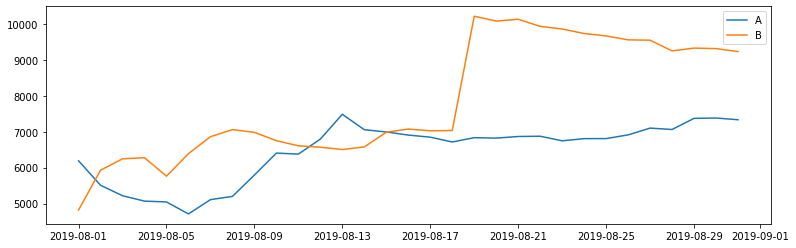

In [26]:
plt.figure(figsize=(13,4))
plt.plot(cummulative_revenue_A['date'], cummulative_revenue_A['average_check'], label='A')
plt.plot(cummulative_revenue_B['date'], cummulative_revenue_B['average_check'], label='B')
plt.legend()
plt.show()

Графики среднего чека по группам довольно не стабильны в первой половине эксперимента. К концу теста средний чек установился для группы А, а в группе В идет тенденция на спад после резкого всплеска. Чтобы понять величину реального среднего чека в группе В нужно больше данных, так как есть искажение в виде всплеска из-за вероятного крупного заказа.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Абсолютно верно! После этого график понятно что не в числе заказов дело -- а в том что попал какой-то крупный.
</div>

---

### Задача 3.

Соберём данные в датасет и построим график отношения средних чеков в группах.

In [27]:
total_revenue = cummulative_revenue_A.merge(
    cummulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])
total_revenue.head()

,date,revenue_A,orders_A,average_check_A,revenue_B,orders_B,average_check_B
0,2019-08-01,148579,24,6190.791667,101217,21,4819.857143
1,2019-08-01,148579,24,6190.791667,101217,21,4819.857143
2,2019-08-01,148579,24,6190.791667,101217,21,4819.857143
3,2019-08-01,148579,24,6190.791667,101217,21,4819.857143
4,2019-08-01,148579,24,6190.791667,101217,21,4819.857143


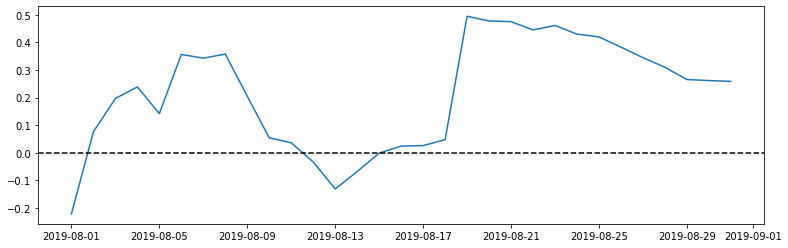

In [28]:
plt.figure(figsize=(13,4))
plt.plot(total_revenue['date'], (total_revenue['average_check_B'] / total_revenue['average_check_A']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График относительного изменения кумулятивного среднего чека группы B к группе A в нескольких точках резко скачет вверх и вниз. Вероятно, в выборках есть аномалии и выбросы.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Верно!) Этот график еще раз это подтверждает
</div>

---

### Задача 4.

Построим графики кумулятивной конверсии в группах.

In [29]:
cummulative_data['conversion'] = cummulative_data['orders'] / cummulative_data['visitors']
cummulative_data.head()
cummulative_data_A = cummulative_data[cummulative_data['group']=='A']
cummulative_data_B = cummulative_data[cummulative_data['group']=='B']

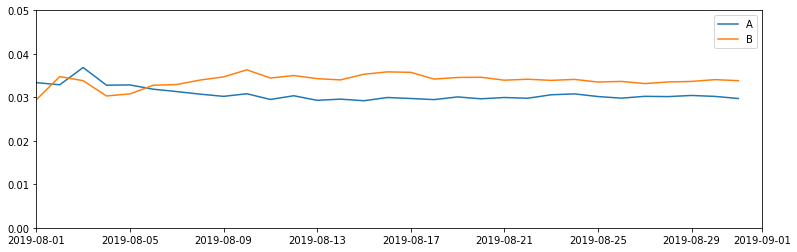

In [30]:
plt.figure(figsize=(13,4))
plt.plot(cummulative_data_A['date'], cummulative_data_A['conversion'], label='A')
plt.plot(cummulative_data_B['date'], cummulative_data_B['conversion'], label='B')
plt.legend()
plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.show()

График кумулятивной конверсии группы В довольно-таки быстро опередил исследуемый показатель в группе А, хотя на первой неделе эксперимента были колебания в обеих группах, но затем графики зафиксировались на одном уровне.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Да, конверсия, стабилизировалась.
</div>

---

### Задача 5.

In [31]:
total_conversions = cummulative_data_A[['date','conversion']].merge(
    cummulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])
total_conversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.03338,0.029453
1,2019-08-01,0.03338,0.029453
2,2019-08-01,0.03338,0.029453
3,2019-08-01,0.03338,0.029453
4,2019-08-01,0.03338,0.029453


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


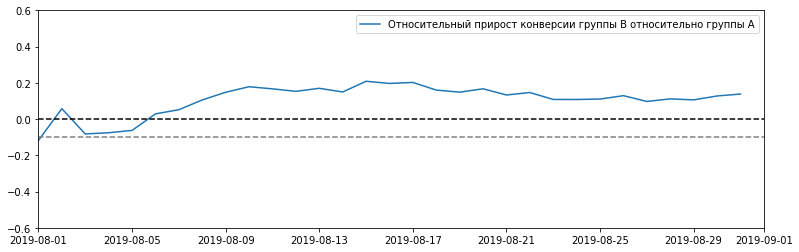

In [32]:
plt.figure(figsize=(13,4))
plt.plot(total_conversions['date'], total_conversions['conversion_B'] / total_conversions['conversion_A']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.6, 0.6])
plt.show()

После некоторых колебаний – быстрого роста, возвращения к стартовому уровню и возобновления роста – конверсия в группе В установилась на одном уровне и всё выглядит так, как будто группа В выиграла.  

Проанализируем аномалии и выясним, как они повлияют на результаты эксперимента.

### Задача 6.

In [33]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Сгруппируем заказы по каждому посетителю сайта и построим точечный график для выявления аномалий.

In [34]:
orders_by_visitors = orders.groupby('visitor_id')[['transaction_id']].nunique().reset_index()
orders_by_visitors.columns = ['visitor_id', 'orders']
orders_by_visitors.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


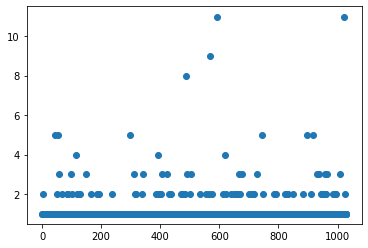

In [35]:
x_values = pd.Series(range(0,len(orders_by_visitors)))
plt.scatter(x_values, orders_by_visitors['orders'])
plt.show()

На графике мы видим, что у нас есть немногочисленные пользователи, которые совершили от 5 до 10 заказов, и, вероятно, являются аномальными.

### Задача 7.

In [36]:
np.percentile(orders_by_visitors['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершили больше 2-х заказов, и не более 1% совершили больше 4-х заказов. Примем за аномальных пользователей тех, кто совершил более 4-х заказов.

### Задача 8.

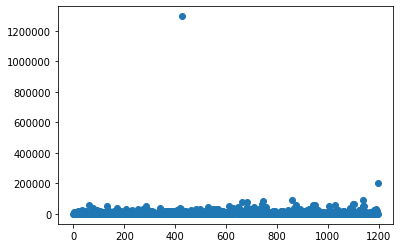

In [37]:
x_values_1 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_1, orders['revenue'])
plt.show()

Налицо крайне аномальный заказ стоимостью выше 1.2 миллиона.

### Задача 9.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов имеют стоимост больше 28000, и не более 1% заказов стоят больше 58233. Примем за аномальных пользователей тех, кто совершил заказ на сумму более 28000.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Все верно -- график позволяет нам убедиться в самом наличии выбросов. А вот перцентили уже помогают найти конкертные значения.

</div>

---

### Задача 10.

In [39]:
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_daily_A']

visitors_cummulative_A = visitors_daily_A.apply(lambda x: visitors_daily_A[visitors_daily_A['date'] <= x['date']]
                                                .agg({'date' : 'max', 'visitors_daily_A' : 'sum'}), axis=1)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

In [40]:
visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_daily_B']

visitors_cummulative_B = visitors_daily_B.apply(lambda x: visitors_daily_B[visitors_daily_B['date'] <= x['date']]
                                                .agg({'date' : 'max', 'visitors_daily_B' : 'sum'}), axis=1)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

In [41]:
orders_daily_A = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_A.columns = ['date', 'orders_daily_A', 'revenue_daily_A']

orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_daily_A' : 'sum',
                'revenue_daily_A' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_A.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

In [42]:
orders_daily_B = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_B.columns = ['date', 'orders_daily_B', 'revenue_daily_B']

orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_daily_B' : 'sum',
                'revenue_daily_B' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_B.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

In [43]:
data = orders_daily_A.merge(orders_daily_B, left_on='date', right_on='date', how='left')\
    .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')\
    .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')\
    .merge(visitors_daily_A, left_on='date', right_on='date', how='left')\
    .merge(visitors_daily_B, left_on='date', right_on='date', how='left')\
    .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')\
    .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')

In [44]:
orders_by_visitors_A = orders[orders['group'] 
                              == 'A'].groupby('visitor_id')[['transaction_id']].nunique().reset_index()
orders_by_visitors_A.columns = ['visitor_id', 'orders']
orders_by_visitors_B = orders[orders['group'] 
                              == 'B'].groupby('visitor_id')[['transaction_id']].nunique().reset_index()
orders_by_visitors_B.columns = ['visitor_id', 'orders']

In [45]:
sample_A = pd.concat([orders_by_visitors_A['orders'],pd.Series(0, index=np.arange(
    data['visitors_daily_A'].sum() - len(orders_by_visitors_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_visitors_B['orders'],pd.Series(0, index=np.arange(
    data['visitors_daily_B'].sum() - len(orders_by_visitors_B['orders'])), name='orders')],axis=0)

In [46]:
print("Статистическая значимость различия в конверсии по сырым данным:", 
      "{0:.5f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

Статистическая значимость различия в конверсии по сырым данным: 0.00840


P-value меньше 0.05, а значит, есть причины полагать, что в конверсии двух групп есть различия.

---

<div class="alert alert-block alert-warning">
    

### Комментарий от наставника

Все верно!) Но можно было еще посчитать относительный прирост в конверсии.

</div>

---

In [65]:
print('Относительный прирост конверсии группы В к конверсии группы А равен:', 
      "{0:.1%}".format((data['orders_daily_B'].sum()/data['visitors_daily_B'].sum())
                       /(data['orders_daily_A'].sum()/data['visitors_daily_A'].sum())-1))

Относительный прирост конверсии группы В к конверсии группы А равен: 13.8%


### Задача 11.

Сравним средние чеки в тестируемых группах.

In [ ]:
sample_A_check = orders[orders['group']=='A']['revenue']
sample_B_check = orders[orders['group']=='B']['revenue']

In [ ]:
print("Статистическая значимость различия в среднем чеке по сырым данным:", 
      "{0:.3f}".format(stats.mannwhitneyu(sample_A_check, sample_B_check)[1]))

Так как уровень значимости больше 0.05, мы не отвергаем нулевую гипотезу о равенстве и утверждаем, что в среднем чеке тестируемых групп различий нет.

---

<div class="alert alert-block alert-warning">
    

### Комментарий от наставника

Наверное ты имела в виде не отвергаем)
</div>

---

In [66]:
print('Относительное различие в среднем чеке между группами:',
      "{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1))

Относительное различие в среднем чеке между группами: 25.9%


### Задача 12.

Удалим выбросы и ещё раз сделаем статистические тесты Манна-Уитни.

In [ ]:
users_many_orders = pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > 4]['visitor_id'], 
                               orders_by_visitors_B[orders_by_visitors_B['orders'] > 4]['visitor_id']], axis = 0)
users_many_orders.head()

In [ ]:
users_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
users_expensive_orders.head()

In [ ]:
abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values()
abnormal_users.count()

In [ ]:
sample_A_clean = pd.concat([orders_by_visitors_A[np.logical_not
                        (orders_by_visitors_A['visitor_id'].isin(abnormal_users))]['orders'],
                        pd.Series(0, index=np.arange(
                        data['visitors_daily_A'].sum() - len(orders_by_visitors_A['orders'])), name='orders')],
                        axis=0)

In [ ]:
sample_B_clean = pd.concat([orders_by_visitors_B[np.logical_not
                        (orders_by_visitors_B['visitor_id'].isin(abnormal_users))]['orders'],
                        pd.Series(0, index=np.arange(
                        data['visitors_daily_B'].sum() - len(orders_by_visitors_B['orders'])), name='orders')],
                        axis=0)

In [ ]:
print("Статистическая значимость различия в конверсии по очищенным данным:",
      "{0:.5f}".format(stats.mannwhitneyu(sample_A_clean, sample_B_clean)[1]))

После исключения аномалий из выборок результаты по сравнению конверсии в группах почти не изменились. Группа В по-прежнему лучше группы А.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Да -- выбросы все-таки не влияют на конверсию ( то что мы видели на графике)
</div>

---

### Задача 13.

In [ ]:
sample_A_check_clean = orders[np.logical_and(orders['group']=='A', 
                                             np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
sample_A_check_clean.head()

In [ ]:
sample_B_check_clean = orders[np.logical_and(orders['group']=='B', 
                                             np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
sample_B_check_clean.head()

In [ ]:
print("Статистическая значимость различия в среднем чеке по очищенным данным:", 
      "{0:.3f}".format(stats.mannwhitneyu(sample_A_check_clean, sample_B_check_clean)[1]))

Результаты теста после удаления выбросов не изменились, средний чек в группах не различается.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Ок)
</div>

---

### Задача 14.

Мы выяснили, что есть статистически значимое различие по конверсии между группами и по неочищенным, и по данным после удаления аномалий;
При этом статистически значимого различия по среднему чеку в группах нет;  
По графику различия конверсии между группами видно, что результаты группы B лучше группы A;  
Также график различия среднего чека в группах показывает, что результаты группы В стабильно улучшаются.  

Построим график кумулятивной выручки в группах по данным без выбросов:

In [ ]:
clean_orders = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

orders_aggregated_clean = dates_groups.apply(
    lambda x: clean_orders[np.logical_and(clean_orders['date'] <= x['date'], clean_orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated_clean.sample(5)

cummulative_data_clean = orders_aggregated_clean.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulative_data_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulative_revenue_A_clean = cummulative_data_clean[cummulative_data_clean['group']=='A'][['date','revenue', 'orders']]
cummulative_revenue_B_clean = cummulative_data_clean[cummulative_data_clean['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(13,4))
plt.plot(cummulative_revenue_A_clean['date'], cummulative_revenue_A_clean['revenue'], label='A')
plt.plot(cummulative_revenue_B_clean['date'], cummulative_revenue_B_clean['revenue'], label='B')
plt.legend()
plt.show()

Несмотря на то, что средний чек в группах не различается, в группе В совершается больше заказов, то есть выше конверсия, и, следовательно, выручка, что видно и на графике. Поэтому тест нужно остановить и зафиксировать победу группы В.

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Верный вывод! А то что ты нарисовала график выручки -- чем подчеркнула победу группы B -- так это вообще здорово)
</div>

---

---

<div class="alert alert-block alert-success">
    

### Общий комментарий от наставника

Все хорошо, работа зачтена. Поздравляю с окончанием спринта)
</div>

---